In [8]:
#Importing Libraries and Loading Dataset

import pandas as pd
df = pd.read_csv("C:/Users/Dhanuja/Downloads/archive (7)/hospital_communication_energy_system.csv")
print(df.head())
print(df.info())
print(df.describe())

             Timestamp Patient ID  Temperature (°C)  Humidity (%)  \
0  2025-01-01 00:00:00      P0001         35.959197     53.116400   
1  2025-01-01 00:05:00      P0002         36.591216     55.613547   
2  2025-01-01 00:10:00      P0003         36.462011     58.424429   
3  2025-01-01 00:15:00      P0004         36.410249     49.649295   
4  2025-01-01 00:20:00      P0005         36.258128     42.872100   

   Oxygen Level (%)  Heart Rate (bpm) Blood Pressure (mmHg)  \
0         98.863328                76             (111, 84)   
1         97.408234                98             (119, 79)   
2         97.106903                93             (132, 79)   
3         96.425162                69             (120, 75)   
4         97.484515                78             (122, 77)   

   Energy Consumption (kWh) Energy Source  Renewable Energy Usage (%)  ...  \
0                 16.747023          Grid                   52.755948  ...   
1                 18.816142          Wind         

In [2]:
#Checking for Missing Values and Cleaning

print(df.isnull().sum())
df = df.dropna()

Timestamp                              0
Patient ID                             0
Temperature (°C)                       0
Humidity (%)                           0
Oxygen Level (%)                       0
Heart Rate (bpm)                       0
Blood Pressure (mmHg)                  0
Energy Consumption (kWh)               0
Energy Source                          0
Renewable Energy Usage (%)             0
HVAC Power Usage (kWh)                 0
Lighting Power Usage (kWh)             0
Medical Equipment Power Usage (kWh)    0
Total Power Usage (kWh)                0
Room Temperature (°C)                  0
Room Humidity (%)                      0
HVAC Mode                              0
HVAC Efficiency (%)                    0
Outdoor Temperature (°C)               0
Outdoor Humidity (%)                   0
Day of the Week                        0
Season                                 0
Energy Saving Mode                     0
System Health Check                    0
AI Predicted Hea

In [3]:
#Handling Duplicate Entries

df = df.drop_duplicates()

In [7]:
#Creating Healthcare-Specific Features and Target Variable

df['Critical_Hours'] = np.where(
    (df['Hour'].between(6, 22)) & (df['Day_of_Week'] < 5), 1, 0
)
energy_threshold = df['Energy Consumption (kWh)'].quantile(0.7)
df['Energy_Waste'] = np.where(
    (df['Critical_Hours'] ==0) &
    (df['Energy Consumption (kWh)'] > energy_threshold), 1, 0
)
df['HVAC_to_Total_Ratio'] = df['HVAC Power Usage (kWh)'] / df['Total Power Usage (kWh)']
df['Medical_to_Total_Ratio'] = df['Medical Equipment Power Usage (kWh)'] / df['Total Power Usage (kWh)']
df['Lighting_to_Total_Ratio'] = df['Lighting Power Usage (kWh)'] / df['Total Power Usage (kWh)']

print("Healthcare-specific features created!")
print(f"Energy waste detected in {df['Energy_Waste'].sum()} out of {len(df)} records")

Healthcare-specific features created!
Energy waste detected in 1532 out of 10000 records


<Figure size 1200x600 with 0 Axes>

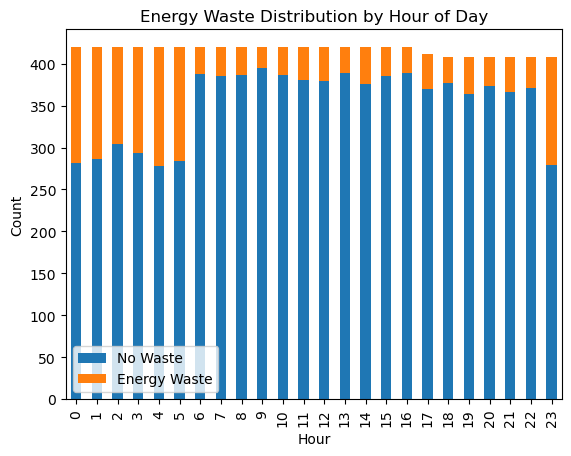

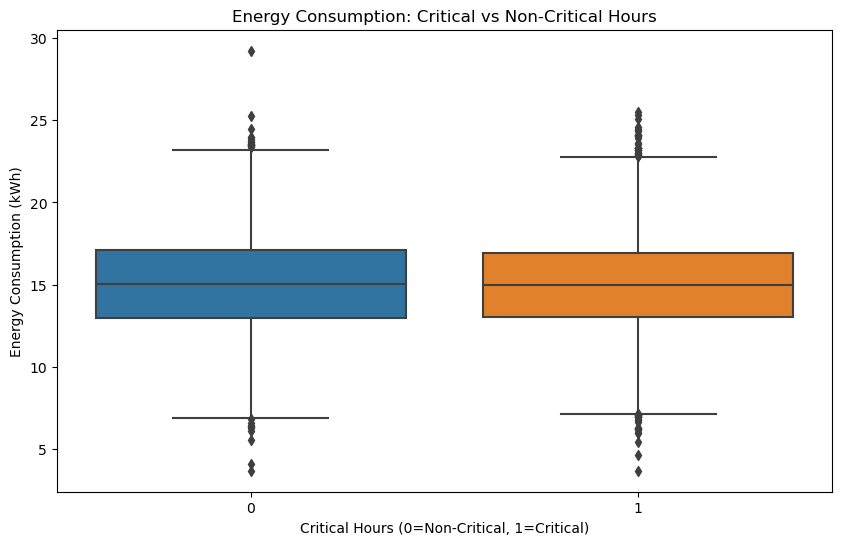

In [7]:
# Week 2: Load data and perform Exploratory Data Analysis (EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use your full file path to load the dataset
file_path = 'C:/Users/Dhanuja/Downloads/archive (7)/hospital_communication_energy_system.csv'
df = pd.read_csv(file_path)

# Quick preprocessing (from our previous cells)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek

# Recreate Critical_Hours and Energy_Waste if not already in df
df['Critical_Hours'] = np.where(
    (df['Hour'].between(6, 22)) & (df['Day_of_Week'] < 5), 1, 0
)
threshold = df['Energy Consumption (kWh)'].quantile(0.7)
df['Energy_Waste'] = np.where(
    (df['Critical_Hours'] == 0) & (df['Energy Consumption (kWh)'] > threshold), 1, 0
)

# Now visualize energy waste distribution by hour
plt.figure(figsize=(12, 6))
waste_by_hour = df.groupby(['Hour', 'Energy_Waste']).size().unstack()
waste_by_hour.plot(kind='bar', stacked=True)
plt.title('Energy Waste Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(['No Waste', 'Energy Waste'])
plt.show()

# Energy consumption patterns during critical vs non-critical hours
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Critical_Hours', y='Energy Consumption (kWh)')
plt.title('Energy Consumption: Critical vs Non-Critical Hours')
plt.xlabel('Critical Hours (0=Non-Critical, 1=Critical)')
plt.show()


In [13]:
# Week 2: Load data and create any missing features
import pandas as pd
import numpy as np

# Use your full file path
file_path = 'C:/Users/Dhanuja/Downloads/archive (7)/hospital_communication_energy_system.csv'
df = pd.read_csv(file_path)

# Convert Timestamp (if not already done)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create time features if missing
if 'Hour' not in df.columns:
    df['Hour'] = df['Timestamp'].dt.hour
if 'Day_of_Week' not in df.columns:
    df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
if 'Month' not in df.columns:
    df['Month'] = df['Timestamp'].dt.month

# Create ratio features if missing
if 'HVAC_to_Total_Ratio' not in df.columns:
    df['HVAC_to_Total_Ratio'] = df['HVAC Power Usage (kWh)'] / df['Total Power Usage (kWh)']
if 'Medical_to_Total_Ratio' not in df.columns:
    df['Medical_to_Total_Ratio'] = df['Medical Equipment Power Usage (kWh)'] / df['Total Power Usage (kWh)']
if 'Lighting_to_Total_Ratio' not in df.columns:
    df['Lighting_to_Total_Ratio'] = df['Lighting Power Usage (kWh)'] / df['Total Power Usage (kWh)']

# Create Critical_Hours and Energy_Waste if missing
if 'Critical_Hours' not in df.columns:
    df['Critical_Hours'] = np.where(
        (df['Hour'].between(6, 22)) & (df['Day_of_Week'] < 5), 1, 0
    )
if 'Energy_Waste' not in df.columns:
    threshold = df['Energy Consumption (kWh)'].quantile(0.7)
    df['Energy_Waste'] = np.where(
        (df['Critical_Hours'] == 0) & (df['Energy Consumption (kWh)'] > threshold), 1, 0
    )

print("Data loaded and all required columns created/verified.")
print(df.columns.tolist())  # Verify columns


Data loaded and all required columns created/verified.
['Timestamp', 'Patient ID', 'Temperature (°C)', 'Humidity (%)', 'Oxygen Level (%)', 'Heart Rate (bpm)', 'Blood Pressure (mmHg)', 'Energy Consumption (kWh)', 'Energy Source', 'Renewable Energy Usage (%)', 'HVAC Power Usage (kWh)', 'Lighting Power Usage (kWh)', 'Medical Equipment Power Usage (kWh)', 'Total Power Usage (kWh)', 'Room Temperature (°C)', 'Room Humidity (%)', 'HVAC Mode', 'HVAC Efficiency (%)', 'Outdoor Temperature (°C)', 'Outdoor Humidity (%)', 'Day of the Week', 'Season', 'Energy Saving Mode', 'System Health Check', 'AI Predicted Health Status', 'Hour', 'Day_of_Week', 'Month', 'HVAC_to_Total_Ratio', 'Medical_to_Total_Ratio', 'Lighting_to_Total_Ratio', 'Critical_Hours', 'Energy_Waste']


In [14]:
Prepare data for ML models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select features (based on your engineered columns)
feature_columns = [
    'Hour', 'Day_of_Week', 'Month',
    'Energy Consumption (kWh)', 'HVAC Power Usage (kWh)',
    'Lighting Power Usage (kWh)', 'Medical Equipment Power Usage (kWh)',
    'Room Temperature (°C)', 'Room Humidity (%)',
    'Outdoor Temperature (°C)', 'Outdoor Humidity (%)',
    'HVAC_to_Total_Ratio', 'Medical_to_Total_Ratio', 'Lighting_to_Total_Ratio',
    'HVAC Efficiency (%)', 'Renewable Energy Usage (%)'
]

X = df[feature_columns]
y = df['Energy_Waste']  # target variable

# Split data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Energy waste in training: {y_train.sum()}")
print(f"Energy waste in test: {y_test.sum()}")


Training set size: 8000
Test set size: 2000
Energy waste in training: 1226
Energy waste in test: 306


In [15]:
# Week 2: Train and evaluate ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Select best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with accuracy {results[best_model]:.4f}")



=== Random Forest ===
Accuracy: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1694
           1       1.00      1.00      1.00       306

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


=== Logistic Regression ===


C:\Users\Dhanuja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9015
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1694
           1       0.72      0.58      0.64       306

    accuracy                           0.90      2000
   macro avg       0.82      0.77      0.79      2000
weighted avg       0.90      0.90      0.90      2000


=== SVM ===
Accuracy: 0.8525
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1694
           1       0.82      0.05      0.09       306

    accuracy                           0.85      2000
   macro avg       0.84      0.52      0.50      2000
weighted avg       0.85      0.85      0.79      2000


Best Model: Random Forest with accuracy 0.9995


In [16]:
# Week 2: Calculate potential energy savings
total_energy_waste = df[df['Energy_Waste'] == 1]['Energy Consumption (kWh)'].sum()
total_energy = df['Energy Consumption (kWh)'].sum()
waste_percentage = (total_energy_waste / total_energy) * 100 if total_energy > 0 else 0

print(f"Total Energy Consumption: {total_energy:.2f} kWh")
print(f"Total Energy Waste: {total_energy_waste:.2f} kWh")
print(f"Waste Percentage: {waste_percentage:.2f}%")

# Estimate cost savings (assume $0.10 per kWh)
cost_per_kwh = 0.10
cost_savings = total_energy_waste * cost_per_kwh
print(f"Potential Cost Savings: ${cost_savings:.2f}")


Total Energy Consumption: 150217.83 kWh
Total Energy Waste: 28374.81 kWh
Waste Percentage: 18.89%
Potential Cost Savings: $2837.48
